<a href="https://colab.research.google.com/github/TanuRajput110/python-projects/blob/main/bike_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
df1=pd.read_excel("/content/drive/MyDrive/projects..(pythpn.sql.excel)/bike purchase analysis/csv/bike purchase1.xlsx")
df1.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
df=df1.copy()

In [ ]:
df.duplicated().sum()

26

26

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
df.columns


Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [ ]:
col=['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike']
for i in col:
  print(f"unique values of {i} ----\n{df[i].unique()}")
  

unique values of Marital Status ----
['M' 'S']
unique values of Gender ----
['F' 'M']
unique values of Income ----
[ 40000  30000  80000  70000  10000 160000  20000 120000  90000 170000
  60000 100000 130000 150000  50000 110000]
unique values of Children ----
[1 3 5 0 2 4]
unique values of Education ----
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
unique values of Occupation ----
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
unique values of Home Owner ----
['Yes' 'No']
unique values of Cars ----
[0 1 2 4 3]
unique values of Commute Distance ----
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
unique values of Region ----
['Europe' 'Pacific' 'North America']
unique values of Age ----
[42 43 60 41 36 50 33 58 40 54 55 35 45 38 59 47 56 34 63 29 44 32 26 31
 62 30 28 65 48 66 46 52 39 61 37 68 51 25 49 53 27 67 57 70 78 69 64 89
 80 73 74 71 72]
unique values of Purchased Bike ----
['No' 'Yes']
unique values 

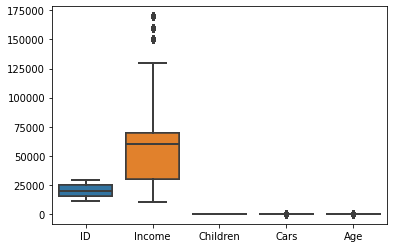

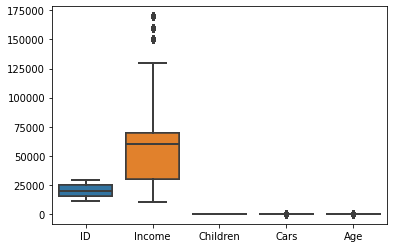

In [ ]:
#checking for outliers
for i in col:
  sns.boxplot(data=df)

#Data cleaning

1.Change categories in column marital status and gender...(m-Married,S-Single)(f-female,m-male).

2.Change income into number currency

3.convert age into some range category as a new column.

4.Replace (yes- owner,no- not an owner) in home owner column.

5.rename in commute distance(row having 10+ miles into more than 10 miles.

In [ ]:
df['Marital Status']=df['Marital Status'].replace({'M': 'Married', 'S': 'Single'})

In [ ]:
df['Gender']=df['Gender'].replace({'F': 'Female', 'M': 'Male'})

In [ ]:
df['Income']=df['Income'].replace('$','')

In [ ]:
df['Home Owner']=df['Home Owner'].replace({'Yes': 'Owner', 'No': 'Not an Owner'})

In [ ]:
df['Commute Distance']=df['Commute Distance'].replace('10+ Miles','More than 10 Miles')

In [ ]:
bins= [0,31,54,100]
labels = ['adult','Middle Age','Old Age']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df=df.drop(['Age'], axis=1)

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Purchased Bike,AgeGroup
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Owner,0,0-1 Miles,Europe,No,Middle Age
1,24107,Married,Male,30000,3,Partial College,Clerical,Owner,1,0-1 Miles,Europe,No,Middle Age
2,14177,Married,Male,80000,5,Partial College,Professional,Not an Owner,2,2-5 Miles,Europe,No,Old Age
3,24381,Single,Male,70000,0,Bachelors,Professional,Owner,1,5-10 Miles,Pacific,Yes,Middle Age
4,25597,Single,Male,30000,0,Bachelors,Clerical,Not an Owner,0,0-1 Miles,Europe,Yes,Middle Age


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Purchased Bike,AgeGroup
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Owner,0,0-1 Miles,Europe,No,Middle Age
1,24107,Married,Male,30000,3,Partial College,Clerical,Owner,1,0-1 Miles,Europe,No,Middle Age
2,14177,Married,Male,80000,5,Partial College,Professional,Not an Owner,2,2-5 Miles,Europe,No,Old Age
3,24381,Single,Male,70000,0,Bachelors,Professional,Owner,1,5-10 Miles,Pacific,Yes,Middle Age
4,25597,Single,Male,30000,0,Bachelors,Clerical,Not an Owner,0,0-1 Miles,Europe,Yes,Middle Age


#EDA

In [ ]:
col2=['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'AgeGroup',
       ]